In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%203%20-%20Lesson%202c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-11-01 23:02:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4001:812::2010, 2800:3f0:4001:800::2010, 2800:3f0:4001:807::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4001:812::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: '/tmp/sarcasm.json'

     0K .......... .......... .......... .......... ..........  0%  472K 12s
    50K .......... .......... .......... .......... ..........  1% 5.80M 6s
   100K .......... .......... .......... .......... ..........  2% 6.37M 4s
   150K .......... .......... .......... .......... ..........  3% 6.23M 3s
   200K .......... .......... .......... .......... ..........  4% 4.78M 3s
   250K .......... .......... .......... .......... ..........  5% 5.92M 3s
   300K .......... .......... .......... .......... ..........  6% 6.57M 2s

In [6]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

  4400K .......... .......... .......... .......... .......... 80% 38.8M 0s
  4450K .......... .......... .......... .......... .......... 81% 10.5M 0s
  4500K .......... .......... .......... .......... .......... 82% 4.10M 0s
  4550K .......... .......... .......... .......... .......... 83% 4.77M 0s
  4600K .......... .......... .......... .......... .......... 84% 11.4M 0s
  4650K .......... .......... .......... .......... .......... 85% 16.7M 0s
  4700K .......... .......... .......... .......... .......... 86% 22.6M 0s
  4750K .......... .......... .......... .......... .......... 87% 22.1M 0s
  4800K .......... .......... .......... .......... .......... 88% 13.9M 0s
  4850K .......... .......... .......... .......... .......... 88% 13.3M 0s
  4900K .......... .......... .......... .......... .......... 89% 31.8M 0s
  4950K .......... .......... .......... .......... .......... 90% 18.9M 0s
  5000K .......... .......... .......... .......... .......... 91% 19.9M 0s
  5050K ....

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=1)

Epoch 1/50
625/625 [==============================] - 2s 4ms/step - loss: 0.4654 - accuracy: 0.7662 - val_loss: 0.4039 - val_accuracy: 0.8150
Epoch 2/50
625/625 [==============================] - 2s 3ms/step - loss: 0.3579 - accuracy: 0.8393 - val_loss: 0.3952 - val_accuracy: 0.8207
Epoch 3/50
625/625 [==============================] - 2s 3ms/step - loss: 0.3166 - accuracy: 0.8615 - val_loss: 0.4069 - val_accuracy: 0.8171
Epoch 4/50
625/625 [==============================] - 2s 3ms/step - loss: 0.2853 - accuracy: 0.8780 - val_loss: 0.4140 - val_accuracy: 0.8204
Epoch 5/50
625/625 [==============================] - 2s 4ms/step - loss: 0.2507 - accuracy: 0.8962 - val_loss: 0.4318 - val_accuracy: 0.8199
Epoch 6/50
625/625 [==============================] - 2s 4ms/step - loss: 0.2164 - accuracy: 0.9131 - val_loss: 0.4648 - val_accuracy: 0.8158
Epoch 7/50
625/625 [==============================] - 2s 3ms/step - loss: 0.1812 - accuracy: 0.9304 - val_loss: 0.5565 - val_accuracy: 0.8024
Epoch 

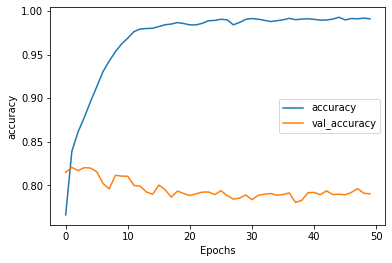

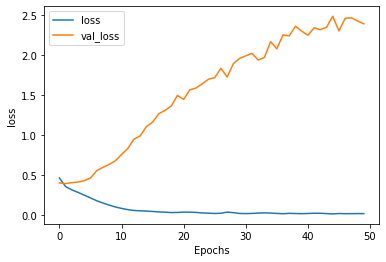

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("test.h5")